# Proyek Analisis Data: Bike Sharing Data Set
- **Nama:** Anggit Rizki Fadilah
- **Email:** anggitrizki99@gmail.com
- **ID Dicoding:** anggitrizkif

## Menentukan Pertanyaan Bisnis

- Pada musim apakah total jumlah sewa sepeda tertinggi di tahun 2011?
- Apakah terdapat hubungan antara suhu dengan jumlah pengguna yang terdaftar?
- Apakah cuaca (weathersit) berpengaruh terhadap jumlah sewa sepeda (cnt) pada musim springer(season 1)?
- Berapa distribusi per jam sewa sepeda pada hari libur natal pada tahun 2011?

## Import Semua Packages/Library yang Digunakan

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [64]:
days_df = pd.read_csv ("Bike-sharing-dataset/day.csv")
hours_df = pd.read_csv("Bike-sharing-dataset/hour.csv")

In [65]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [66]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### Data Type

In [67]:
print(days_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


(!)Berdasarkan hasil pengamatan data days_df ditemukan satu kesalahan pada jenis data di kolom "dtday" seharusnya bertipe data "datetime" bukan "object"

In [68]:
print(hours_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


(!)Pada data hours_df juga ditemukan kesalahan yang sama seperti pada data days_df yaitu tipe data pada kolom "dtday" seharusnya bertipe data "datetime"

### Duplicate Data 

In [69]:
print('Jumlah Duplikasi Data days_df: ', days_df.duplicated().sum())
days_df.describe()

Jumlah Duplikasi Data days_df:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [70]:
print('Jumlah Duplikasi Data hours_df: ', hours_df.duplicated().sum())
hours_df.describe()

Jumlah Duplikasi Data hours_df:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ditemukan adanya duplikasi data dan keanehan pada data days_df dan hours_df

### Missing Value

In [71]:
print('Info days_df:')
print(days_df.isna().sum())

print('\n')

print('Info hours_df:')
print(hours_df.isna().sum())

Info days_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Info hours_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ditemukan *missing value* pada kedua data

## Cleaning Data

### Mengganti tipe data

In [72]:
#Mengganti tipe data pada days_df
days_df["dteday"] = pd.to_datetime(days_df["dteday"])

#Mengganti tipe data pada hours_df
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

In [73]:
#Mengecek tipe data 'dteday' pada days_df dan hours_df
print('days_df[dteday]: ', days_df['dteday'].dtypes)
print('hours_df[dteday]: ', hours_df['dteday'].dtypes)

days_df[dteday]:  datetime64[ns]
hours_df[dteday]:  datetime64[ns]


Tipe data pada kolom 'dtday' telah diganti menjadi bertipe datetime. FIXED

# Exploratory Data Analysis (EDA)

### Explore days_df

In [74]:
days_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
174,175,2011-06-24,3,0,6,0,5,1,1,0.724167,0.656583,0.573333,0.222025,969,4022,4991
166,167,2011-06-16,2,0,6,0,4,1,2,0.628333,0.595346,0.688333,0.206471,545,3222,3767
92,93,2011-04-03,2,0,4,0,0,0,1,0.378333,0.378767,0.480000,0.182213,1651,1598,3249
559,560,2012-07-13,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.080850,1511,5988,7499
277,278,2011-10-05,4,0,10,0,3,1,1,0.538333,0.527138,0.647917,0.177250,559,4267,4826


In [75]:
days_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [76]:
filtered_days_df = days_df[(days_df['yr'] == 1)]
rent_per_month=filtered_days_df.groupby("mnth")['cnt'].mean().reset_index()
rent_per_month.set_index("mnth", inplace=True)
rent_per_month

,cnt
mnth,
1,3120.774194
2,3556.448276
3,5318.548387
4,5807.466667
5,6318.225806
6,6761.000000
7,6567.967742
8,6919.451613
9,7285.766667


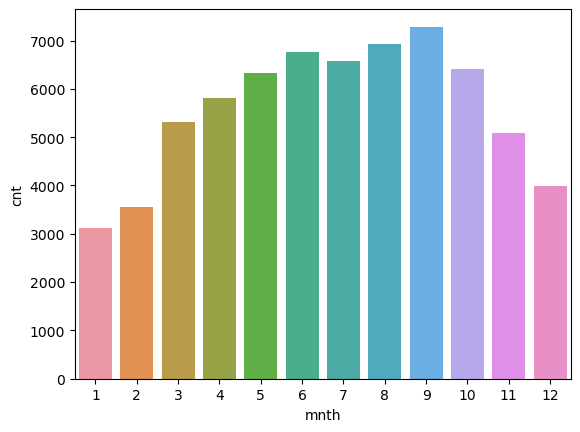

In [77]:
plt.figure()

sns.barplot(data=rent_per_month, x=rent_per_month.index, y="cnt")
plt.show()

In [78]:
most_rent=days_df.groupby("dteday")['cnt'].mean().reset_index().sort_values(by="cnt", ascending=False)
most_rent.set_index("dteday", inplace=True)
most_rent

,cnt
dteday,
2012-09-15,8714.0
2012-09-29,8555.0
2012-09-22,8395.0
2012-03-23,8362.0
2012-05-19,8294.0
...,...
2011-03-06,605.0
2011-01-26,506.0
2012-12-26,441.0


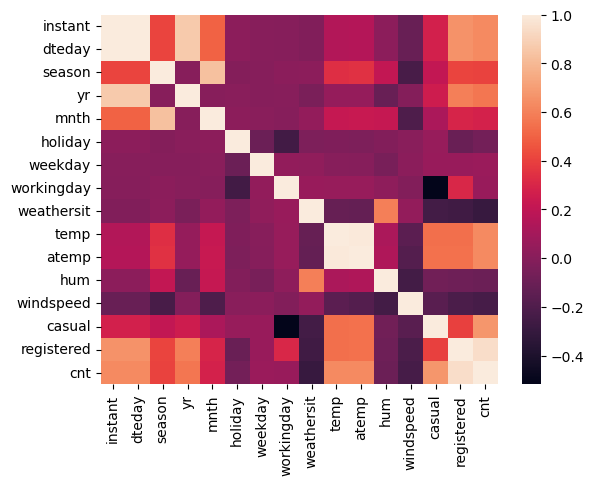

In [79]:
#melihat heatmap untuk melihat korelasi pada Data Frame "days_df"
corr = days_df.corr()

plt.figure()
sns.heatmap(corr)
plt.show()

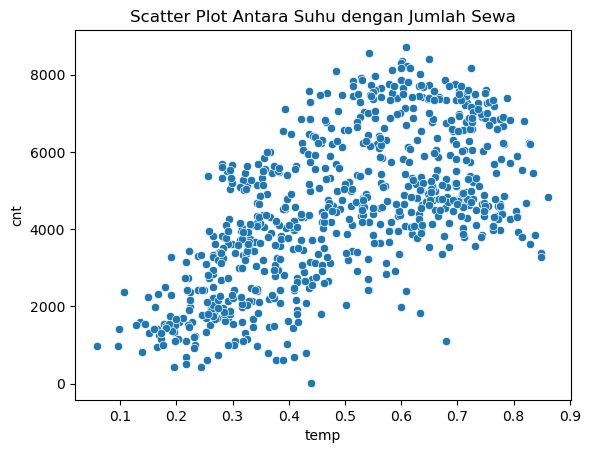

In [80]:
#Scatter plot antara suhu (temp) dengan jumlah sewa (cnt)
plt.figure()

sns.scatterplot(data = days_df, x = 'temp', y = 'cnt',)
plt.title('Scatter Plot Antara Suhu dengan Jumlah Sewa')
plt.show()

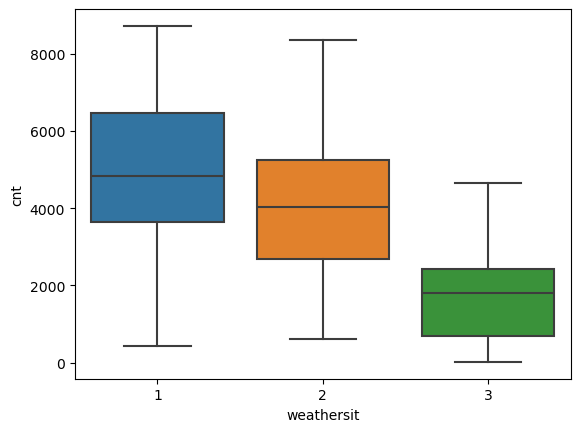

In [81]:
#Hubungan antara cuaca (weathersit) dengan Jumlah Sewa (cnt)
plt.figure()
sns.boxplot(data = days_df, x = 'weathersit', y = 'cnt')

plt.show()

### Explore hours_df

In [82]:
hours_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17044,17045,2012-12-17,4,1,12,23,0,1,1,3,0.42,0.4242,0.94,0.2239,6,41,47
12862,12863,2012-06-25,3,1,6,3,0,1,1,1,0.68,0.6364,0.69,0.2537,1,4,5
5992,5993,2011-09-12,3,0,9,6,0,1,1,1,0.56,0.5303,0.83,0.0000,1,108,109
13246,13247,2012-07-11,3,1,7,3,0,3,1,1,0.64,0.5758,0.89,0.1343,0,5,5
1491,1492,2011-03-07,1,0,3,12,0,1,1,1,0.30,0.2727,0.42,0.4179,28,68,96


In [83]:
hours_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


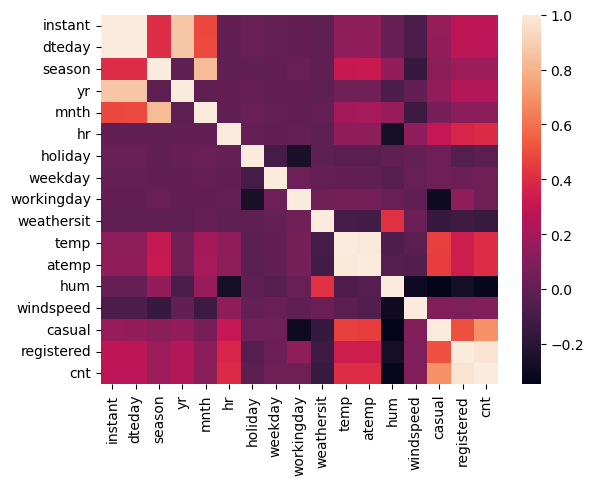

In [84]:
#Melihat heatmap untuk melihat korelasi pada Data Frame "hours_df"
corr = hours_df.corr()

plt.figure()
sns.heatmap(corr)
plt.show()

# Visualization & Explanatory Analysis

### Pertanyaan 1:

**Pada musim apakah total jumlah sewa sepeda tertinggi di tahun 2011?**

In [85]:
# Menghitung total sewa sepeda (cnt) untuk setiap musim (season) pada tahun (yr) 2011 (yr == 0)
season_total_rentals = days_df[days_df['yr'] == 0].groupby('season')['cnt'].sum().sort_values(ascending=False)

# Menampilkan hasil
for season, total_rentals in season_total_rentals.items():
    print("Jumlah sewa sepeda yang terjadi selama musim", season, ":", total_rentals)



Jumlah sewa sepeda yang terjadi selama musim 3 : 419650
Jumlah sewa sepeda yang terjadi selama musim 2 : 347316
Jumlah sewa sepeda yang terjadi selama musim 4 : 326137
Jumlah sewa sepeda yang terjadi selama musim 1 : 150000


Dari hasil analisis diatas memperlihatkan bahwa jumlah sewa sepeda tertinggi pada tahun 2011 terjadi selama musim gugur/fall (3), sedangkan jumlah sewa sepeda terendah pada tahun 2011 terjadi selama musim semi/springer (1).

### Pertanyaan 2:

**Apakah terdapat hubungan antara suhu dengan jumlah pengguna yang terdaftar?**

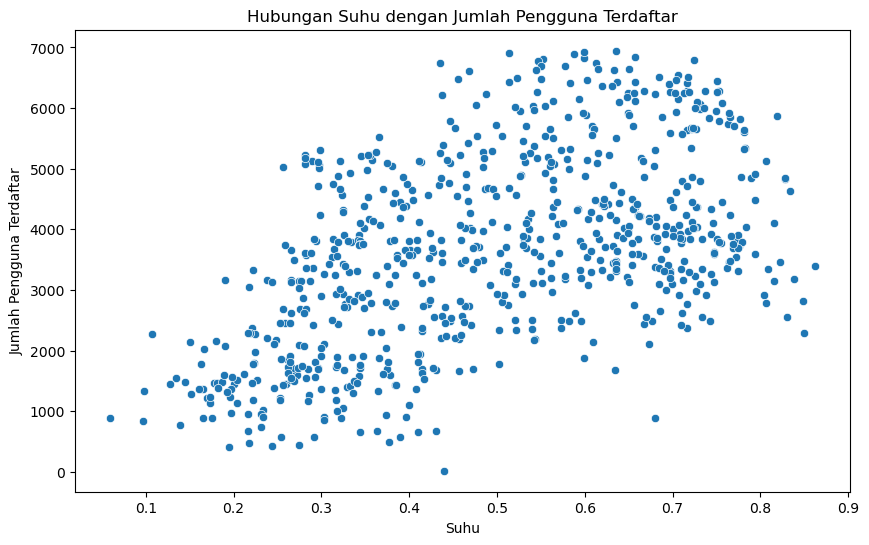

In [86]:
#Membuat scatter plot menggunakan Seaborn untuk memvisualisasikan hubungan antara suhu (temp) dengan jumlah pengguna terdaftar (registered)
plt.figure(figsize=(10, 6))

sns.scatterplot(x='temp', y='registered', data=days_df)
plt.title('Hubungan Suhu dengan Jumlah Pengguna Terdaftar')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Pengguna Terdaftar')

plt.show()


Pada grafik scatter plot diatas merupakan korelasi positif yang menunjukan jika suhu(temp) meningkat akan memengaruhi meningkatnya jumlah pengguna yang terdaftar (registered)

### Pertanyaan 3:

**Apakah cuaca (**weathersit**) berpengaruh terhadap jumlah sewa sepeda (**cnt**) pada musim springer(season **1**)?**

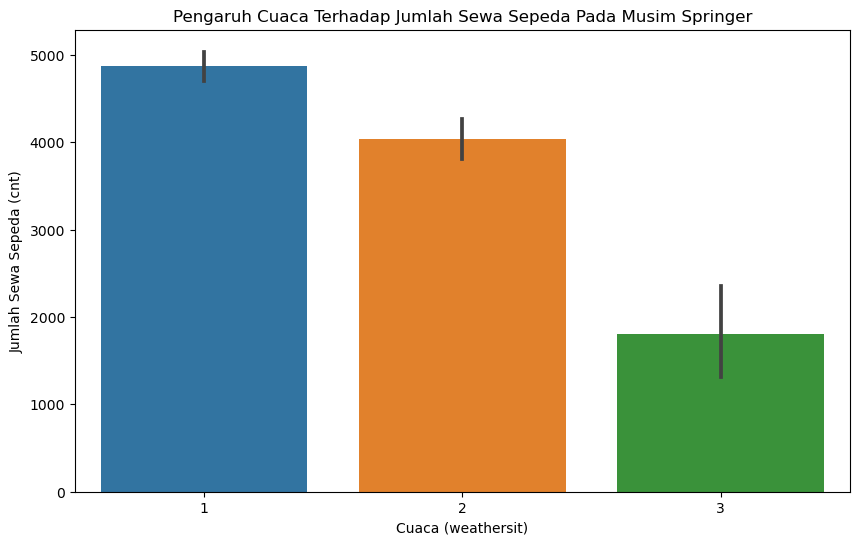

In [87]:
#Memfilter  musim semi/springer(1)
filtered_days_df = days_df[(days_df['season'] == 1)]

#Membuat boxplot menggunakan Seaborn untuk memvisualisasikan pengaruh antara cuaca (weathersit) dengan jumlah sewa sepeda (cnt)
plt.figure(figsize=(10, 6))

sns.barplot(x='weathersit', y='cnt', data=days_df)
plt.title('Pengaruh Cuaca Terhadap Jumlah Sewa Sepeda Pada Musim Springer')
plt.xlabel('Cuaca (weathersit)')
plt.ylabel('Jumlah Sewa Sepeda (cnt)')

plt.show()

Diagram batang diatas merupakan hasil yang sudah dianalisis terkait pengaruh cuaca terhadap jumlah sewa sepeda. Dapat disimpulkan bahwa perubahan cuaca memiliki dampak yang cukup signifikan terhadap tindakan pengguna sepeda. Untuk lebih jelas, seperti pada cuaca 1 (Cerah, Sedikit berawan, Sebagian berawan), trend peminjaman sepeda cenderung mengalami peningkatan yang signifikan.

### Pertanyaan 4:

**Berapa distribusi per jam sewa sepeda pada hari libur natal dan musim panas pada tahun 2011**

In [88]:
# Memfilter data tahun 2011 (yr=0), Hari libur Natal (holiday = 1), dan musim dingin/winter (season 4)
filtered_data = hours_df[(hours_df["yr"] == 0) & (hours_df["holiday"] == 1) & (hours_df["season"] == 4)]

# Hitung distribusi per jam (hr) sewa sepeda (cnt)
distribusi_per_jam = filtered_data.groupby("hr")["cnt"].sum()

print("Distribusi per jam sewa sepeda pada Hari Natal tahun 2011:")
print(distribusi_per_jam)

Distribusi per jam sewa sepeda pada Hari Natal tahun 2011:
hr
0     142
1      77
2      52
3      22
4      16
5      45
6      96
7     275
8     558
9     501
10    563
11    634
12    754
13    776
14    785
15    749
16    754
17    843
18    718
19    563
20    365
21    284
22    239
23    169
Name: cnt, dtype: int64


Ini menggambarkan pola penggunaan sepeda selama Hari Natal, yang menggambarkan kegiatan liburan dan rutinitas masyarakat pada tanggal tersebut. Dapat dilihat bahwa pada hari natal jumlah penyewaan sepeda mengalami kenaikan pada jam 8 pagi hingga pukul 6 sore masih terlihat stabil. Namun sampai malam hari masih banyak yang menggunakan sewa sepeda, mungkin disebabkan karena banyak pelanggan yang sedang/sesudah merayakan malam natal.

# Conclusion

1. Pada tahun 2011, total jumlah sewa sepeda tertinggi terjadi pada musim gugur/fall (season 3), dengan jumlah sebesar 419,650. Sedangkan jumlah sewa sepeda terendah terjadi pada musim semi/spring (season 1), dengan jumlah sebesar 150,000.

2. Terdapat hubungan positif antara suhu (temp) dan jumlah pengguna terdaftar (registered), yang menunjukkan bahwa meningkatnya suhu akan meningkatkan jumlah pengguna terdaftar.

3. Analisis terhadap pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda (cnt) pada musim semi/spring (season 1) menunjukkan bahwa perubahan cuaca memiliki dampak yang signifikan terhadap tindakan pengguna sepeda. Pada cuaca yang cerah, sedikit berawan, dan sebagian berawan (weathersit 1), terjadi peningkatan yang signifikan dalam jumlah sewa sepeda.

4. Analisis terhadap distribusi per jam sewa sepeda pada Hari Natal tahun 2011 menunjukkan bahwa pola sewa sepeda berbeda-beda setiap jamnya, dengan puncak sewa sepeda terjadi pada jam 17 (5 sore) dan jam 18 (6 sore).

Kesimpulannya, untuk meningkatkan jumlah sewa sepeda, disarankan untuk fokus pada musim gugur/fall dan memperhatikan faktor cuaca. Peningkatan suhu juga dapat menjadi faktor yang meningkatkan jumlah pengguna terdaftar. Pada musim winter sendiri mungkin dapat difokuskan pada hari libur natal ataupun malam natal.

In [89]:
days_df.to_csv("days.csv", index=False)
hours_df.to_csv("hours.csv", index=False)